### Augmented Dickey-FullerTest

If a price series is mean reverting, then the current price level will tell us something about what the price’s next move will be: If the price level is higher than the mean, the next move will be a downward move; if the price level is lower than the mean, the next move will be an upward move. The ADF test is based on just this observation.

We can describe the price changes using a linear model:

$$
Δy(t)=λy(t−1)+μ+βt+α_1Δy(t−1)+...+α_kΔy(t−k)+ ε_t \;\;\;\;\; (2.1)
$$

where $Δy(t)≡y(t)−y(t−1),Δy(t−1)≡y(t−1)−y(t−2)$, and so on.

* $λy(t-1)$: This term represents the influence of the previous price, $y(t-1)$, on the current price change. $λ$ is a coefficient that determines the strength of this influence.
* $μ$: This term represents a constant or intercept in the model. It represents any fixed or average change in price that is not accounted for by other factors.
* $βt$: This term represents the influence of time, $t$, on the price change. $β$ is a coefficient that determines the rate at which price changes over time.
* $α_1Δy(t-1) + ... + α_kΔy(t-k)$: These terms represent the influence of lagged price changes, $Δy(t-1), Δy(t-2), ..., Δy(t-k)$, on the current price change. $α_1, α_2, ..., α_k$ are coefficients that determine the strength of these influences.
* $ε_t$: This term represents the error or residual in the model, capturing any unexplained or random variation in the price changes that is not accounted for by the other factors.

Overall, this model aims to capture the relationship between past price changes, time, and the current price change, with the coefficients $(λ, μ, β, α_1, ..., α_k)$ determining the magnitude and direction of these influences. The error term $(ε_t)$ accounts for any unobserved or unpredictable factors affecting the price changes.

The ADF test will find out if $λ = 0$. If the hypothesis $λ = 0$ can be rejected, that means the
next move $Δy(t)$ depends on the current level $y(t − 1)$, and therefore it is not a random walk. The test statistic is the regression coefficient $λ$ (with $y(t − 1)$ as the independent variable and $Δy(t)$ as the dependent variable) divided by the standard error of the regression fit: $λ/SE(λ)$. The statisticians Dickey and Fuller have kindly found out for us the distribution of this test statistic and tabulated the critical values for us, so we can look up for any value of $λ/SE(λ)$ whether the hypothesis can be rejected at, say, the 95 percent probability level.

Notice that since we expect mean regression, $λ/SE(λ)$ has to be negative, and it has to be more negative than the critical value for the hypothesis to be rejected. The critical values themselves depend on the sample size and whether we assume that the price series has a non-zero mean $−μ/λ$ or a steady drift $−βt/λ$. In practical trading, the constant drift in price, if any,
tends to be of a much smaller magnitude than the daily fluctuations in price. So for simplicity we will assume this drift term to be zero $(β = 0)$.

### Example 2.1: Using ADF Test for Mean Reversion

The [adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) function is included in statsmodels module. We will try the test on the exchange rate USD.CAD (how many Canadian dollars in exchange for one U.S. dollar). Sampling the data at intraday frequency will not increase the statistical significance of the ADF test. We can see from Figure 2.2 that it does not look very stationary.

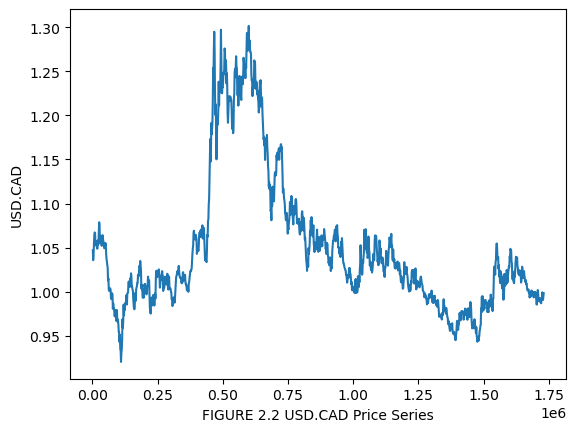

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df=pd.read_csv('inputData_USDCAD.csv')

y=df.loc[df['Time']==1659, 'Close']

plt.xlabel("FIGURE 2.2 USD.CAD Price Series")
plt.ylabel("USD.CAD")
plt.plot(y)

We can see from Figure that it does not look very stationary.

In [2]:
results=adfuller(y, maxlag=1, regression='c', autolag=None)
print(results)
print(f"\nADF t-statistic: {results[0]}")
print(f"\np-value: {results[1]}")
print(f"\ncritical values: {results[4]}")

(-1.8430182830405535, 0.3593229859889191, 1, 1214, {'1%': -3.4357480073434905, '5%': -2.863923702481129, '10%': -2.568039121778048})

ADF t-statistic: -1.8430182830405535

p-value: 0.3593229859889191

critical values: {'1%': -3.4357480073434905, '5%': -2.863923702481129, '10%': -2.568039121778048}


And indeed, you should find that the ADF test statistic is about −1.84, but the critical value at the 90 percent level is -2.568, so we can’t reject the hypothesis that λ is zero. In other words, we can’t show that USD.CAD is stationary, which perhaps is not surprising, given that the Canadian dollar is known as a commodity currency, while the U.S. dollar is not. But note that λ is negative, which indicates the price series is at least not trending.

Let's try another ADF Test example with stablecoin DAI/USD price data from Gemini exchange.

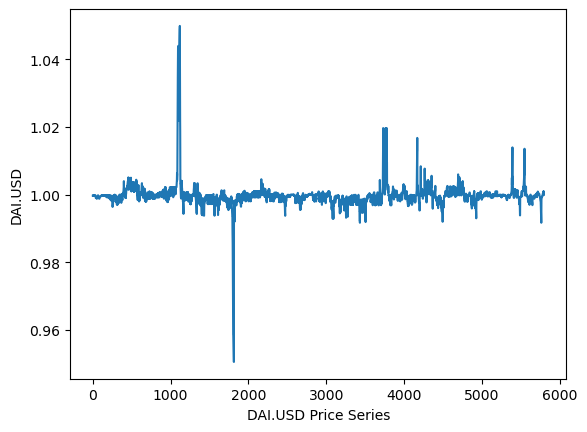

In [3]:
df2 = pd.read_hdf('inputData_DAIUSD.h5')

y2 = df2['price']

plt.xlabel("DAI.USD Price Series")
plt.ylabel("DAI.USD")
plt.plot(y2)

In [4]:
results=adfuller(y2, maxlag=1, regression='c', autolag=None)
print(results)
print(f"\nADF t-statistic: {results[0]}")
print(f"\np-value: {results[1]}")
print(f"\ncritical values: {results[4]}")

(-11.548749995682124, 3.4889778430086796e-21, 1, 5793, {'1%': -3.431479328500268, '5%': -2.8620390561151785, '10%': -2.5670356455887386})

ADF t-statistic: -11.548749995682124

p-value: 3.4889778430086796e-21

critical values: {'1%': -3.431479328500268, '5%': -2.8620390561151785, '10%': -2.5670356455887386}


The ADF test statistics is actually $λ/𝑆𝐸(λ)$, which is always negative for mean reversion. Here, the ADF test statistics is -11.55, for 99% confidence, we can reject the null hypothesis, that is, the DAI/USD pair is stationary.

A more negative (lower) test statistic suggests stronger evidence for stationarity.

In the context of the Augmented Dickey-Fuller (ADF) test, the test statistic is used to assess the presence of unit roots in a time series. A unit root implies that the time series is non-stationary, meaning it has a trend or other non-constant patterns over time.

The ADF test statistic is a negative number, and its magnitude indicates the strength of the evidence against the null hypothesis of non-stationarity. The more negative (lower) the test statistic, the stronger the evidence against the null hypothesis and in favor of stationarity.

Here's the intuition behind this relationship:

1. Null Hypothesis: The null hypothesis of the ADF test is that the time series has a unit root, indicating non-stationarity.

2. Alternative Hypothesis: The alternative hypothesis is that the time series is stationary, meaning it lacks a unit root.

3. Test Statistic: The ADF test statistic measures the deviation from the null hypothesis. If the test statistic is significantly negative (i.e., more negative than the critical values), it provides evidence against the null hypothesis and supports the alternative hypothesis of stationarity.

4. Critical Values: The ADF test compares the test statistic with critical values at different significance levels. These critical values are determined based on the sample size and the specific test configuration. If the test statistic is more negative than the critical values, it falls into the rejection region, indicating rejection of the null hypothesis and suggesting stationarity.

In summary, a more negative (lower) ADF test statistic indicates stronger evidence against the null hypothesis of non-stationarity and supports the notion of stationarity in the time series.